# Operations on distribution functions
In this example, we demonstrate various operations on distribution functions using the probabilistic library.

### Define a stochastic variable
First, we import the necessary packages:

In [1]:
from probabilistic_library import DistributionType, Stochast, StandardNormal
from utils.plotting import plot_dist
import numpy as np

Next, we create a stochastic variable object:

In [2]:
stochast = Stochast()

Let's consider a stochastic variable, which is uniformly distributed over the interval $[-1, 1]$. This is defined as follows:

In [3]:
stochast.distribution = DistributionType.uniform
stochast.minimum = -1
stochast.maximum = 1

The properties of this distribution are:

In [4]:
stochast.print()

Variable:
  distribution = uniform
Definition:
  minimum = -1.0
  maximum = 1.0
Derived values:
  mean = 0.0
  deviation = 0.5773502691896257
  variation = 0.0


These are derived properties, but can also be set explicitly (leading to the update of the other parameters):

In [5]:
stochast.mean = 2.0
stochast.deviation = 1.0

stochast.print()

Variable:
  distribution = uniform
Definition:
  minimum = 0.2679491924311228
  maximum = 3.732050807568877
Derived values:
  mean = 2.0
  deviation = 0.9999999999999999
  variation = 0.49999999999999994


In [6]:
stochast.mean = 2.0
stochast.variation = 1.0

stochast.print()

Variable:
  distribution = uniform
Definition:
  minimum = -1.4641016151377544
  maximum = 5.464101615137754
Derived values:
  mean = 2.0
  deviation = 1.9999999999999998
  variation = 0.9999999999999999


### Quantiles

A quantile can be calculated with `stochast.get_quantile()`, for example:

In [7]:
p = 0.75
print(f"x({p}) {stochast.get_quantile(p)}")

x(0.75) 3.7320508075688776


Another option is to use the function `StandardNormal.get_u_from_p()`, which converts the non-exceeding probability of $0.75$ into the corresponding value in the standard normal space ($u$-space). Subsequently, `stochast.get_x_from_u()` translates it back to the original space ($x$-space).

In [8]:
u = StandardNormal.get_u_from_p(p)
print(f"x({p}) = {stochast.get_x_from_u(u)}")

x(0.75) = 3.7320508075688776


### Design value

A `design_value` of a variable is defined as the value obtained by dividing the value corresponding to a specific `design_quantile` by the `design_factor`. For example:

In [9]:
stochast.design_quantile = 0.75
stochast.design_factor = 0.99

stochast.print()

Variable:
  distribution = uniform
Definition:
  minimum = -1.4641016151377544
  maximum = 5.464101615137754
  design_quantile = 0.75
  design_factor = 0.99
Derived values:
  mean = 2.0
  deviation = 1.9999999999999998
  variation = 0.9999999999999999
  design_value = 3.769748290473614


The `design_value` can be set explicitely, leading to an update of the properties of the random variable (while `design_quantile`, `design_factor` and `variation` remain unchanged):

In [10]:
stochast.design_value = 3.5

stochast.print()

Variable:
  distribution = uniform
Definition:
  minimum = -1.3593370081945169
  maximum = 5.07311477919061
  design_quantile = 0.75
  design_factor = 0.99
Derived values:
  mean = 1.8568888854980465
  deviation = 1.856888885498046
  variation = 0.9999999999999998
  design_value = 3.500001850852857


### Truncated distribution function
Let's consider a normal distribution function with a `location` of $0.0$ and a `scale` of $1.0$:

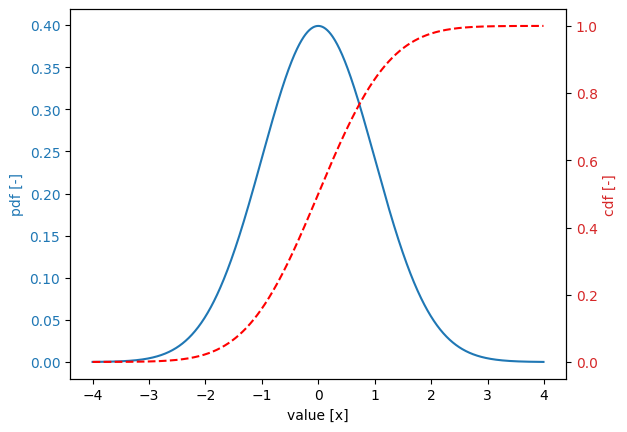

In [11]:
stochast = Stochast()
stochast.distribution = DistributionType.normal
stochast.location = 0.0
stochast.scale = 1.0
stochast.plot()

To truncate a distribution, we use the `truncated` attribute.

In [12]:
stochast.truncated = True

The truncation interval is specified using the `minimum` and `maximum` properties. If these are not defined, the original domain of the distribution is used (i.e., no truncation is applied).

Suppose we want to truncate this distribution to the interval $[-0.5, \infty)$. If this is the first time truncation is applied in the project, it is sufficient to specify only the `minimum` value:

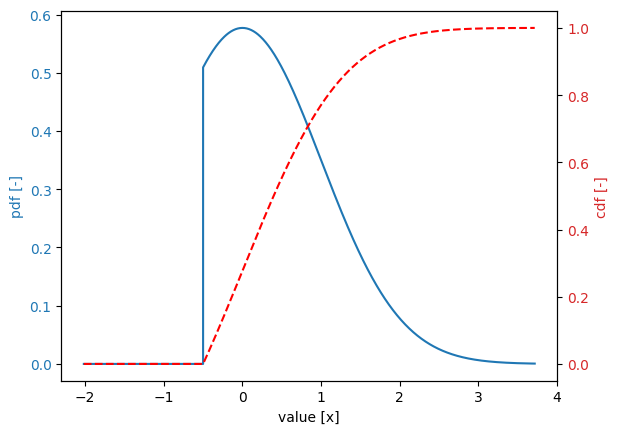

In [13]:
stochast.minimum = -0.5

stochast.plot()

If we want to truncate the same distribution to the interval $(-\infty, 0.5]$, we need to specify both the `minimum` and `maximum` properties. Otherwise, the minimum would remain set to $-0.5$.

x(0.75) = 0.24231313244667643
Variable:
  distribution = normal (truncated)
Definition:
  location = 0.0
  scale = 1.0
  minimum = -0.5
  maximum = 0.5
Derived values:
  mean = 0.0
  deviation = 1.0
  variation = 0.0


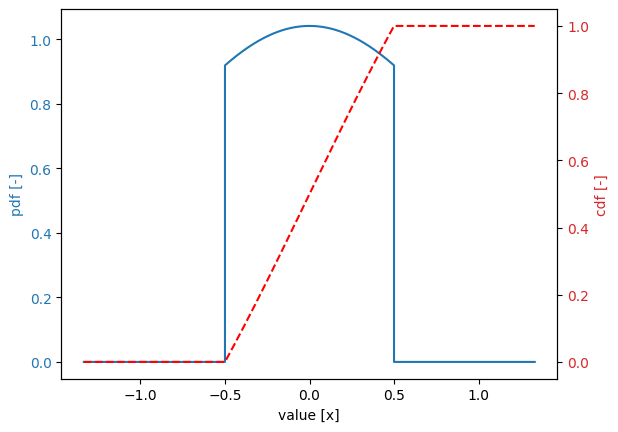

In [14]:
stochast.truncated = True
stochast.minimum = -0.5
stochast.maximum = 0.5

p = 0.75
print(f"x({p}) = {stochast.get_quantile(p)}")

stochast.print()
stochast.plot()

### Inverted distribution function

Let's consider a log-normal distribution function with a `location` of $1.0$, a `scale` of $0.5$ and a `shift` of $0.0$:

x(0.99) = 8.69870302551546
Variable:
  distribution = log_normal
Definition:
  location = 1.0
  scale = 0.5
  shift = 0.0
Derived values:
  mean = 3.080216848918031
  deviation = 1.6415718456238662
  variation = 0.5329403500277882


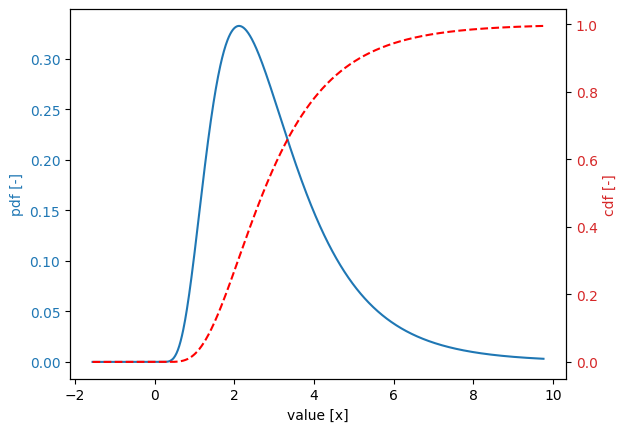

In [15]:
stochast = Stochast()
stochast.distribution = DistributionType.log_normal
stochast.location = 1.0
stochast.scale = 0.5
stochast.shift = 0.0

p = 0.99
print(f"x({p}) = {stochast.get_quantile(p)}")

stochast.print()
stochast.plot()

We want to invert this distribution function with respect to the `shift` value. Here's how it can be done:

x(0.01) = -8.69870302551546
Variable:
  distribution = log_normal (inverted)
Definition:
  location = 1.0
  scale = 0.5
  shift = 0.0
Derived values:
  mean = -3.080216848918031
  deviation = 1.6415718456238662
  variation = 0.5329403500277882


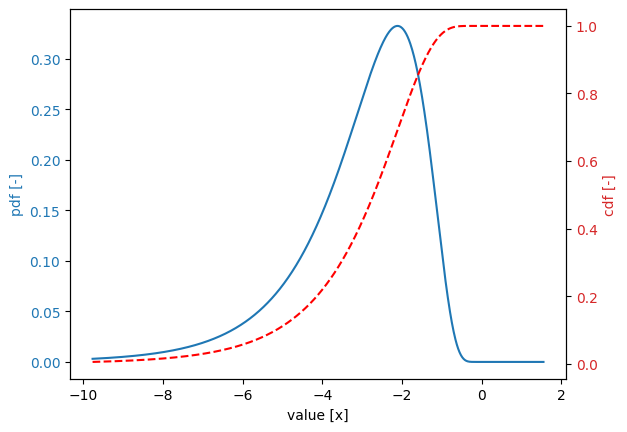

In [16]:
stochast.inverted = True

p = 0.01
print(f"x({p}) = {stochast.get_quantile(p)}")

stochast.print()
stochast.plot()

### Fit parameters of a distribution function
It is also possible to estimate parameters of a distribution function from data. In this example, we consider the following dataset:

In [17]:
data = [2.3, 0.0, -1.0, 2.6, 2.7, 2.8, 3.3, 3.4, 1.0, 3.0, 0.0, -2.0, -1.0]

Let's consider a normal distribution. By using `stochast.fit()`, we obtain the fitted `mean` and `deviation`:

In [18]:
stochast = Stochast()
stochast.distribution = DistributionType.normal
stochast.fit(data)

print(f"fitted location = {stochast.location}, scale = {stochast.scale}")

fitted location = 1.3153846153846152, scale = 1.8959809043720852


The goodness of fit can be assessed using the Kolmogorov-Smirnov test through the `get_ks_test()` method:

In [19]:
print(f"kolmogorov smirnov test = {stochast.get_ks_test(data)}")

kolmogorov smirnov test = 0.23669173779063168


When we consider a log-normal distribution, the fitted parameters are as follows:

In [20]:
stochast = Stochast()
stochast.distribution = DistributionType.log_normal
stochast.fit(data)
print(f"fitted location = {stochast.location}, scale = {stochast.scale}")
print(f"mean = {stochast.mean}, std = {stochast.deviation}")

fitted location = 1.5964855623845133, scale = 0.4261942592095209
mean = 1.4049020870683506, std = 2.412211284018044


The result of the goodness-of-fit test is:

In [21]:
print(f"kolmogorov smirnov test = {stochast.get_ks_test(data)}")

kolmogorov smirnov test = 0.2550238105742991
